In [0]:
import pandas as pd
!gdown https://drive.google.com/uc?id=1l8oLRneIBNJtQa-wMa1FocajjdRGLmyj
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']  
# load the tweets:
pima = pd.read_csv("diabetes.csv", header=None,names=col_names)


Downloading...
From: https://drive.google.com/uc?id=1l8oLRneIBNJtQa-wMa1FocajjdRGLmyj
To: /content/diabetes.csv
100% 23.9k/23.9k [00:00<00:00, 15.6MB/s]


In [0]:
pima=pima.drop(0, axis=0)

In [0]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


**Selecting Feature**
*Here, we need to divide the given columns into two types of variables dependent(or target variable) and independent variable(or feature variables).*

In [0]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

**Splitting Data**
*To understand model performance, dividing the dataset into a training set and a test set is a good strategy.*

*Let's split dataset by using function train_test_split(). 
We need to pass 3 parameters features, target, and test_set size. 

Additionally, we can use random_state to select records randomly.*  

In [0]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split 


In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

#'random_state' is used as a seed value to maintain reproducibility,
#which means every time when you split the data will not affect the results. 
#Also, if random_state is None, then random number generator uses np.random for selecting records randomly. 
#It means If you don't set a seed, it is different each time.

Here, the Dataset is broken into two parts in a ratio of 75:25. It means 75% data will be used for model training and 25% for model testing.



**Model Development and Prediction**
*First, import the Logistic Regression module and create a Logistic Regression classifier object using LogisticRegression() function.*

*Then, fit your model on the train set using fit() and perform prediction on the test set using predict().* 

In [0]:
# import the class
from sklearn.linear_model import LogisticRegression



In [0]:
# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


**Model Evaluation using Confusion Matrix**
*A confusion matrix is a table that is used to evaluate the performance of a classification model. You can also visualize the performance of an algorithm. The fundamental of a confusion matrix is the number of correct and incorrect predictions are summed up class-wise.*

In [0]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[119,  11],
       [ 26,  36]])

Here, we can see the confusion matrix in the form of the array object.

The dimension of this matrix is 2*2 because this model is binary classification. We can have two classes 0 and 1.

Diagonal values represent accurate predictions,
while non-diagonal elements are inaccurate predictions.

In the output, 119 and 36 are actual predictions, and 26 and 11 are incorrect predictions.

Text(0.5, 257.44, 'Predicted label')

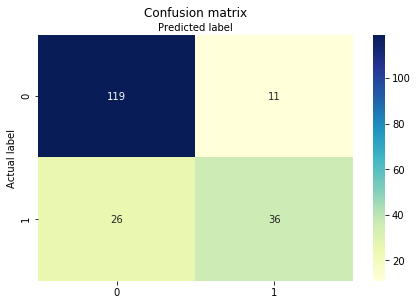

In [0]:
#visualize the confusion matrix using Heatmap.

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [0]:
#evaluate the model using model evaluation metrics such as accuracy, precision, and recall.

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))


Accuracy: 0.8072916666666666


In [0]:
#y_predlist=y_pred.tolist() 
#y_predlist

y_test = [ int(s) for s in y_test]

y_pred = [ int(s) for s in y_pred]

In [0]:
#y_testarray=np.asarray(y_test)

In [0]:
print("Precision:",metrics.precision_score(y_test,y_pred))


Precision: 0.7659574468085106


In [0]:
print("Recall:",metrics.recall_score(y_test,y_pred))


Recall: 0.5806451612903226


<function matplotlib.pyplot.show>

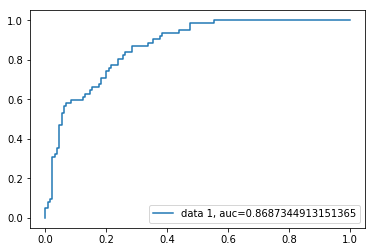

In [0]:
#Receiver Operating Characteristic(ROC) curve is a plot of the true positive rate against the false positive rate. 
#It shows the tradeoff between sensitivity and specificity.

y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show

AUC score for the case is 0.86. AUC score 1 represents perfect classifier, and 0.5 represents a worthless classifier.

Other model evalutions **Explained variance score**  (https://scikit-learn.org/stable/modules/model_evaluation.html)

In [0]:
 from sklearn.metrics import explained_variance_score
explained_variance_score(y_test, y_pred)  

#In statistics, explained variation measures the proportion to which a mathematical model accounts for the variation (dispersion) of a given data set. 



0.14652605459057078

The best possible score is 1.0, lower values are worse.

In [0]:
#The max_error function computes the maximum residual error 
#a metric that captures the worst case error between the predicted value and the true value
from sklearn.metrics import max_error
max_error(y_test, y_pred)

1

In a perfectly fitted single output regression model, max_error would be 0 on the training set and though this would be highly unlikely in the real world, this metric shows the extent of error that the model had when it was fitted.

In [0]:
#The mean_absolute_error function computes mean absolute error,
#a risk metric corresponding to the expected value of the absolute error loss or -norm loss.

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, y_pred)

0.19270833333333334

In [0]:
#The median_absolute_error is particularly interesting because it is robust to outliers.
#The loss is calculated by taking the median of all absolute differences between the target and the prediction.

from sklearn.metrics import median_absolute_error
median_absolute_error(y_test, y_pred)